<h1>What does prior actually mean?</h1>
<h3>The prior probability of a model as a whole or parameters as part of that model are independent of the yet-to-come measurement. In general, we want to incorporate information which we already know (a priori), so that we can have a 'weighted' estimate, given our prior belief and our measurement, i.e. likelihood, for an a posteriori result. In lax terms, the prior probability (density distribution), and the posterior probability (density distribution) are just abbreviated 'prior' and 'posterior'.<br>
    The concept of a likelihood, 'how likely is it to measure the data, given the model' is known. So how do we include or prior knowledge? This is where the Bayes Theorem comes into play - the law of conditional probabilities:<br><br>
    $P(M|D) = \frac{P(D|M)P(M)}{P(D)}$<br><br>
    The conditional probability $P(M|D)$ describes the probability that $M$ occurs, given that $D$ is true (consider what $M$ and $D$ mean for us). $P(M)$ and $P(D)$ are the probabilities that $M$ or $D$ occur, unconditionally. and $P(D|M)$ is the probability that $D$ occurs, given that $M$ is true.<br><br>
    From the last notebook where we included data $D$ and model $M$, we saw that $P(D|M)$ is the likelihood. Now in addition, $P(M)$ is the prior (i.e. the one thing independent of the data(!)), $P(D)$ is the so-called 'evidence', a factor that, for these considerations that follow here, is unimportant (for taking the derivative, it'll be $0$, and for integration, it's independent of the model parameters), and finally $P(M|D)$ is the posterior. The latter is what we are estimating when we do a 'Bayesian fit', i.e.  weighting the likelihood by a prior.<br><br>
    As an example, I use the same as in the previous notebook: Photon (any) counting experiments follows the Poisson distribution:<br><br>
    $P(d|m) = \frac{m^d e^{-m}}{d!}$<br><br>
    Example: Suppose you measure for $1\,\mathrm{hr}$ in your lab and detect $d=0$ photons from your source. What is the observed rate $\lambda$ (assuming $\lambda$ is constant in time)? Suppose further that somebody told you that they recently measured $\mu_m \pm \sigma_m = 10 \pm 2$ counts as an average of a series of the same experiments.<br>
    You might (still) think, it's obviously zero, but now we have additional information:<br>
    The likelihood is still the same: $P(d=0|m) = \frac{m^0 e^{-m}}{0!}$<br>
    The prior, in the way it is reported from that somebody, is given as mean and standard deviation of a normal distrribution: $P(m|\mu_m,\sigma_m) = \frac{1}{\sqrt{2\pi}\sigma_m}\exp\left(-\frac{1}{2} \left( \frac{m-\mu_m}{\sigma_m} \right)^2\right)$.<br>
    This means we now think that $m$ should be 'somewhere' around $\mu_m = 10$ with a standard deviation $\sigma_m = 2$, so $P(m|\mu_m = 10,\sigma_m = 2) = \frac{1}{\sqrt{2\pi}2}\exp\left(-\frac{1}{2} \left( \frac{m-10}{2} \right)^2\right)$.<br>
    As mentioned above, I will ignore $P(d)$ because it is tedious to calculate and doesn't even matter (it normalises the posterior, so that it will be a proper probability density function, i.e. $\int P(m|d)\,dm = 1$, or equivalent $P(d) = \int P(d|m)P(m) \, dm = 1$ (try to write it out and see that it won't be easy, even in this case; NB: there are classes of priors that 'fit' to a certain likelihood, i.e. make the posterior (and evidence) analytically solvable. These are called 'conjugate priors'. For the Poisson likelihood, this would be the $\Gamma$-distribution. For the Normal likelihood, it's the Normal distribution.). Instead, we can again use the logarithm of the product $P(m|d) \propto P(d|m)P(m)$, such that<br>
    $\ln P(m|d) \sim \ln P(d|m) + \ln P(m)$.<br>
    So, the only thing we do is adding something to the log-likelihood. This can be considered a penalty to the likelihood or something similar to a condition on a physical system. In general we have:<br><br>
    $\ln P(m|d,\mu_m,\sigma_m) = -m + d\ln m - \ln(\sqrt{2\pi}\sigma_m) - \frac{1}{2} \left( \frac{m-\mu_m}{\sigma_m} \right)^2$.<br>
    And when we input the numbers we get<br>
    $\ln P(m|d=0,\mu_m=10,\sigma_m=2) = -m + 0\ln m - \ln(d!) - \ln(\sqrt{2\pi}2) - \frac{1}{2} \left( \frac{m-10}{2} \right)^2$,<br>
    from which you can see that a analytic solution is still possible, so we do that.<br>
    We want to find (for example), the maximum a posteriori probability, i.e.<br>
    $\frac{\partial}{\partial m}P(m|d=0,\mu_m=10,\sigma_m=2) = 0$<br>
    $\frac{\partial}{\partial m}(-m - \ln(d!)- \ln(\sqrt{2\pi}2) - \frac{1}{2} \left( \frac{m-10}{2} \right)^2) = 0$<br>
    $-1 - \frac{m-10}{2} = 0$<br>
    $m = 8$<br><br>
    We find a posterior maximum at $m=8$. This is way off our likelihood value (which was somewhat ill-defined since the maximum liklihood was outside any confidence interval, but probably close to $0$ or $1$), and also smaller than the prior we included (in fact, exactly one standard deviation smaller than the prior.<br>
    What about the uncertainty now? Well, since the 'evidence' is somewhat hard to calculate, the integral that would be needed to calculate the uncertainties is somewhat more ugly. Thanks to Monte Carlo integration, we do this all at once, and get the uncertainties for free because we estimate the whole posterior and not only the maximum a posteriori estimate (which you can again consider an arbitrary point in the posterior probability density function).<br><br>
    Let's have a look at that graphically in the following:</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thomas')

In [2]:
plt.style.use('thomas')

In [3]:
# data
d1 = 0.
mu_m = 10.
sigma_m = 2.

# model value array
m = np.linspace(0,20,1000)
# for numerical integration in steps
dm = np.diff(m)[0]

# Poisson distribution (there are scipy function for this)
def Poisson(d,m):
    return m**d*np.exp(-m)/np.math.factorial(d)

# Normal distribution (there are scipy function for this)
def Normal(m,mu,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*((m-mu)/sigma)**2)

# PDFs
Likelihood = Poisson(d1,m)
Prior = Normal(m,mu_m,sigma_m)

# integrating PDFs to for consistency
Likelihood_norm = np.sum(Likelihood*dm)
Prior_norm = np.sum(Prior*dm)
print('Area under curve Likelihood: {0:.3f}'.format(Likelihood_norm))
print('Area under curve Prior: {0:.3f}'.format(Prior_norm))

# Bayes Theorem
Evidence = np.sum(Likelihood*Prior*dm)
Posterior = Likelihood*Prior/Evidence
print('Area under curve Posterior (normalised): {0:.3f}'.format(np.sum(Posterior*dm)))

Area under curve Likelihood: 1.010
Area under curve Prior: 1.000
Area under curve Posterior (normalised): 1.000


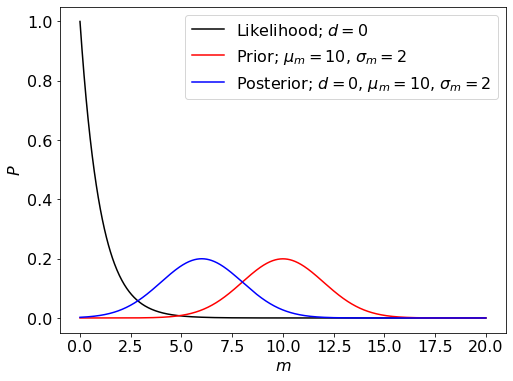

In [4]:
plt.plot(m,Likelihood,label=r'Likelihood; $d=0$')
plt.plot(m,Prior,label=r'Prior; $\mu_m=10$, $\sigma_m = 2$')
plt.plot(m,Posterior,label=r'Posterior; $d=0$, $\mu_m=10$, $\sigma_m = 2$')
plt.xlabel(r'$m$')
plt.ylabel(r'$P$')
plt.legend()

<h3>From this plot you can see that I must've made a mistake in the descriptions above. The point is still valid: Posterior = Likelihood weighted with Prior!</h3>

In [5]:
# case 1: d1 = 0
m_mean = np.sum(Posterior*m*dm)
m_std = np.sqrt(np.sum(Posterior*(m-m_mean)**2*dm))

print('m = {0:.3f} +/- {1:.3f}'.format(m_mean,m_std))

m = 6.009 +/- 1.987


In [6]:
# how to solve the integral equation with python:

In [7]:
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.optimize import minimize

In [8]:
def integrand(x):
    return Poisson(d1,x)*Normal(x,mu_m,sigma_m)/Evidence

def func_ub(b):
    integral,err = quad(integrand, m_mean, m_mean+b)
    return integral - 0.683/2

def func_lb(b):
    integral,err = quad(integrand, m_mean+b, m_mean)
    return integral - 0.683/2

vfunc_ub = np.vectorize(func_ub)
vfunc_lb = np.vectorize(func_lb)

In [9]:
sigma_m_ub = fsolve(vfunc_ub, 0)[0]
sigma_m_lb = fsolve(vfunc_lb, 0)[0]

print('upper bound, sigma+: {0:.3f}'.format(sigma_m_ub))
print('lower bound, sigma-: {0:.3f}'.format(sigma_m_lb))

upper bound, sigma+: 2.003
lower bound, sigma-: -1.992


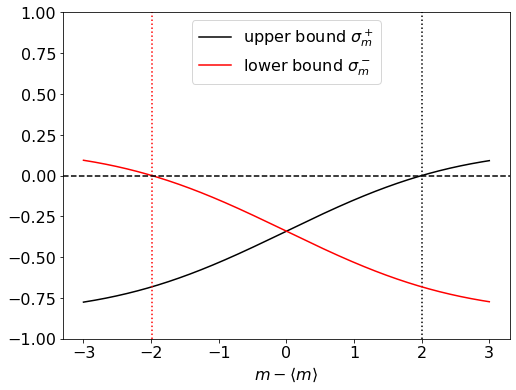

In [10]:
b_arr = np.linspace(-3.,3.,1000)

plt.plot(b_arr,vfunc_ub(b_arr),label='upper bound $\sigma_m^+$',color='black')
plt.axvline(sigma_m_ub,color='black',linestyle=':')
plt.plot(b_arr,vfunc_lb(b_arr),label='lower bound $\sigma_m^-$',color='red')
plt.axvline(sigma_m_lb,color='red',linestyle=':')
plt.axhline(0,linestyle='--')
plt.xlabel(r'$m-\langle m \rangle$')
plt.ylim(-1,1)
plt.legend()

In [11]:
# "2sigma errors"

def func_ub2(b):
    integral,err = quad(integrand, m_mean, m_mean+b)
    return integral - 0.954/2

def func_lb2(b):
    integral,err = quad(integrand, m_mean+b, m_mean)
    return integral - 0.954/2

vfunc_ub2 = np.vectorize(func_ub2)
vfunc_lb2 = np.vectorize(func_lb2)

In [12]:
sigma_m_ub2 = fsolve(vfunc_ub2, 0.5)[0]
sigma_m_lb2 = fsolve(vfunc_lb2, 0)[0]

print('upper bound, 2sigma+: {0:.3f}'.format(sigma_m_ub2))
print('lower bound, 2sigma-: {0:.3f}'.format(sigma_m_lb2))

upper bound, 2sigma+: 4.024
lower bound, 2sigma-: -3.916


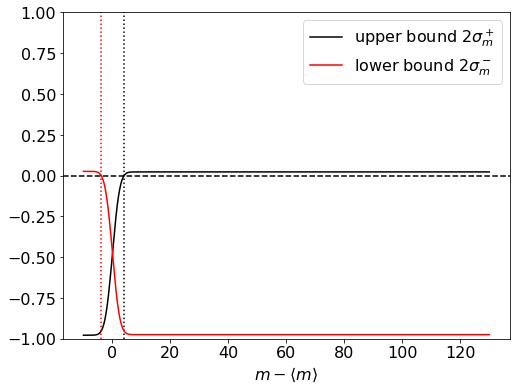

In [13]:
b_arr = np.linspace(-10.,130.,1000)

plt.plot(b_arr,vfunc_ub2(b_arr),label='upper bound $2\sigma_m^+$',color='black')
plt.axvline(sigma_m_ub2,color='black',linestyle=':')
plt.plot(b_arr,vfunc_lb2(b_arr),label='lower bound $2\sigma_m^-$',color='red')
plt.axvline(sigma_m_lb2,color='red',linestyle=':')
plt.axhline(0,linestyle='--')
plt.xlabel(r'$m-\langle m \rangle$')
plt.ylim(-1,1)
plt.legend()

In [14]:
# finding the median of a PDF:

def func_med(m_med):
    integral,err = quad(integrand, m_med, np.inf)
    return integral - 0.5

vfunc_med = np.vectorize(func_med)

In [15]:
m_med = fsolve(vfunc_med, 1)[0]

print('median value: {0:.3f}'.format(m_med))

median value: 6.003


In [16]:
# 1 and 2 sigma around median

def func_ub1_med(b):
    integral,err = quad(integrand, m_med, m_med+b)
    return integral - 0.683/2

def func_ub2_med(b):
    integral,err = quad(integrand, m_med, m_med+b)
    return integral - 0.954/2

def func_lb1_med(b):
    integral,err = quad(integrand, m_med+b, m_med)
    return integral - 0.683/2

def func_lb2_med(b):
    integral,err = quad(integrand, m_med+b, m_med)
    return integral - 0.954/2

vfunc_ub1_med = np.vectorize(func_ub1_med)
vfunc_lb1_med = np.vectorize(func_lb1_med)
vfunc_ub2_med = np.vectorize(func_ub2_med)
vfunc_lb2_med = np.vectorize(func_lb2_med)

In [17]:
sigma_m_med_ub1 = fsolve(vfunc_ub1_med, 0)[0]
sigma_m_med_lb1 = fsolve(vfunc_lb1_med, 0)[0]
sigma_m_med_ub2 = fsolve(vfunc_ub2_med, 0)[0]
sigma_m_med_lb2 = fsolve(vfunc_lb2_med, 0)[0]

print('upper bound, 1sigma+: {0:.3f}'.format(sigma_m_med_ub1))
print('lower bound, 1sigma-: {0:.3f}'.format(sigma_m_med_lb1))
print('upper bound, 2sigma+: {0:.3f}'.format(sigma_m_med_ub2))
print('lower bound, 2sigma-: {0:.3f}'.format(sigma_m_med_lb2))

upper bound, 1sigma+: 2.000
lower bound, 1sigma-: -1.995
upper bound, 2sigma+: 3.989
lower bound, 2sigma-: -3.948


<h3>Now what about multiple parameters? In principle you can define a 'combined prior PDF' of multiple parameters, but this is way beyond anything we want to do. Instead, we can assume that the information we have on these parameters are independent, so that we form a prior like this:<br>
    $P(m|a,b,c) = P(m|a)P(m|b)P(m|c)$<br>
    and have three prior PDFs that are just multiplicative (for example, 3 normal distributions).<br><br>
    Finally, because it is tedious to write every prior directly to such a fitting function, I uploaded a summary of some priors in priors.py:</h3>

In [18]:
from priors import *

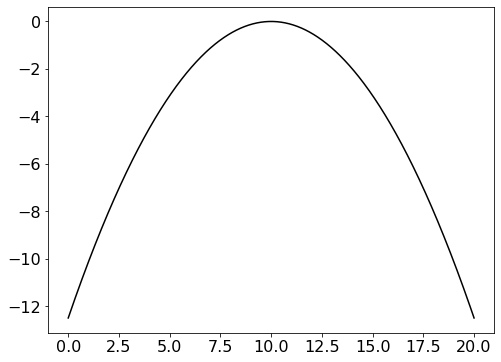

In [19]:
plt.plot(m,normal_prior(m,[10,2]))

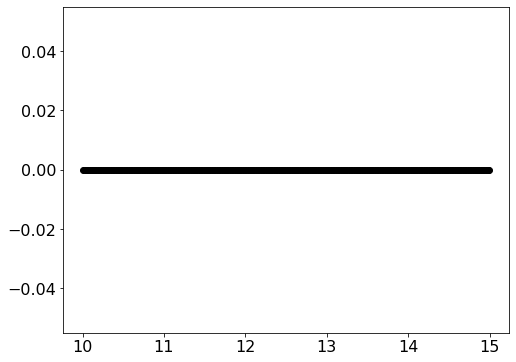

In [20]:
for val in m:
    plt.plot(val,uniform_prior(val,[10,15]),'ko')

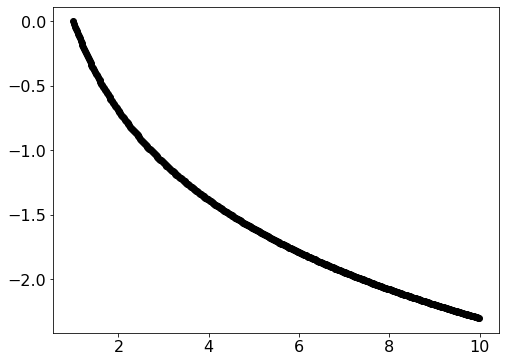

In [21]:
for val in m:
    plt.plot(val,log_uniform_prior(val,[1,10]),'ko')

<h3>Similar to the likelihood in your notebooks, the priors are all logarithmised, which is why, for example the uniform prior (top hat function) is $0$ between the range, but $-\infty$ elsewhere, i.e. penalising everything that is not inside that interval. This is similar to what you do right now with your parameters.</h3>